## Predicting Models With CelebA Dataset
### .

In [1]:
import os
import sys
import datetime

import PIL.Image as Image
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.path.join(os.getcwd(), '../..')
sys.path.append(ROOT_DIR)

In [2]:
from keras_segmentation.models.all_models import model_from_name

from keras_segmentation.predict import predict_multiple

Using TensorFlow backend.
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jho/anaconda3/

In [3]:
now = datetime.datetime.now()
NOW = "{:%Y%m%dT%H%M}".format(now)

In [4]:
OUT_DIR = os.path.join(ROOT_DIR, 'out')
CHECKPOINTS_DIR = os.path.join(OUT_DIR, 'checkpoints')
FACE_CHECKPOINTS_DIR = os.path.join(CHECKPOINTS_DIR, 'celeba/best')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')
LOGS_DIR = os.path.join(OUT_DIR, 'logs')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset/celeba_')

TRAIN_IMAGES = os.path.join(DATASET_DIR, 'train/original')
TRAIN_ANNOTATIONS = os.path.join(DATASET_DIR, 'train/mask')

VAL_IMAGES = os.path.join(DATASET_DIR, 'val/original')
VAL_ANNOTATIONS = os.path.join(DATASET_DIR, 'val/mask')

TEST_IMAGES = os.path.join(DATASET_DIR, 'test/original')
TEST_ANNOTATIONS = os.path.join(DATASET_DIR, 'test/mask')

In [5]:
def __model_path(model_name):
    return os.path.join(FACE_CHECKPOINTS_DIR, '{name}-celeba.h5'.format(name=model_name))

def __predictions_dir(model_name):
    d = os.path.join(PREDICTIONS_DIR, model_name)
    if not os.path.exists(d):
        os.makedirs(d)
    return d

In [6]:
predicts={}

In [9]:
def predict_face(model_name, input_size=(256, 256, 3)):
    i_height, i_width, i_channels = input_size
    model = model_from_name[model_name](
            n_classes=i_channels,
            input_height=i_height,
            input_width=i_width)
    model.load_weights(__model_path(model_name))
    
    model.summary()
    
    predicts = predict_multiple(
            model=model,
            inp_dir=TEST_IMAGES,
            out_dir=__predictions_dir(model_name))
    
    print("Predictions of {count}faces with {name} had been saved to {out_dir}".format(
        count=len(os.listdir(TEST_IMAGES)),
        name=model_name,
        out_dir=__predictions_dir(model_name)
    ))
    
    return predicts
    

### Predict

In [10]:
predicts['fcn_8'] = predict_face('fcn_8', (256, 256, 3))
predicts['fcn_32'] = predict_face('fcn_32', (256, 256, 3))
predicts['unet'] = predict_face('unet', (512, 512, 3))
# predicts['segnet'] = predict_face('segnet', (256, 256, 3))

  0%|          | 0/400 [00:00<?, ?it/s]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D) (None, 258, 258, 3)   0           input_2[0][0]                    
____________________________________________________________________________________________________
conv2d_11 (Conv2D)               (None, 256, 256, 64)  1792        zero_padding2d_6[0][0]           
____________________________________________________________________________________________________
batch_normalization_6 (BatchNorm (None, 256, 256, 64)  256         conv2d_11[0][0]                  
___________________________________________________________________________________________

100%|██████████| 400/400 [00:11<00:00, 34.75it/s]


Predictions of 400faces with fcn_8 had been saved to /home/jho/projects/image-segmentation-keras/train_faces/unet/../../out/predictions/fcn_8


  0%|          | 0/400 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_11 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
activation_13 (Activation)   (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 130, 130, 64)      0         
__________

100%|██████████| 400/400 [00:10<00:00, 36.87it/s]


Predictions of 400faces with fcn_32 had been saved to /home/jho/projects/image-segmentation-keras/train_faces/unet/../../out/predictions/fcn_32


  0%|          | 0/400 [00:00<?, ?it/s]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 512, 512, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_16 (ZeroPadding2D (None, 514, 514, 3)   0           input_4[0][0]                    
____________________________________________________________________________________________________
conv2d_29 (Conv2D)               (None, 512, 512, 64)  1792        zero_padding2d_16[0][0]          
____________________________________________________________________________________________________
batch_normalization_16 (BatchNor (None, 512, 512, 64)  256         conv2d_29[0][0]                  
___________________________________________________________________________________________

100%|██████████| 400/400 [00:10<00:00, 39.79it/s]

Predictions of 400faces with unet had been saved to /home/jho/projects/image-segmentation-keras/train_faces/unet/../../out/predictions/unet


In [11]:
def get_predictions(img_id, models=[]):
    imgs = {}
    for m in models:
        img_path = os.path.join(__predictions_dir(m), img_id + '.jpg')
        imgs[m] = Image.open(img_path)
    
    return imgs

In [13]:
samples = get_predictions('026840', ['unet', 'fcn_8', 'fcn_32'])

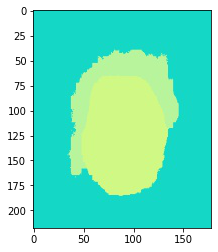

In [16]:
plt.imshow(samples['fcn_8'])

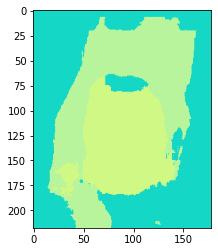

In [15]:
plt.imshow(samples['unet'])

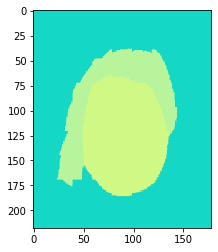

In [17]:
plt.imshow(samples['fcn_32'])